In [2]:
# Assignment: PCA Implementation
# Objective: The objective of this assignment is to implement PCA on a given dataset and analyse the results.






In [1]:
# Instructions:

# Download the wine dataset from the UCI Machine Learning Repository 

# Load the dataset into a Pandas dataframe.

# Split the dataset into features and target variables.

# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary. 

# Implement PCA on the preprocessed dataset using the scikit-learn library.

# Determine the optimal number of principal components to retain based on the explained variance ratio.

# Visualise the results of PCA using a scatter plot.

# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

# Interpret the results of PCA and clustering analysis.


In [3]:
# Deliverables:

# Jupyter notebook containing the code for the PCA implementation.

# A report summarising the results of PCA and clustering analysis.

# Scatter plot showing the results of PCA.

# A table showing the performance metrics for the clustering algorithm.


# Additional Information:

# You can use the python programming language.

# You can use any other machine learning libraries or tools as necessary.

# You can use any visualisation libraries or tools as necessary.



In [7]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import requests
from io import StringIO

# Url Of The Wine Dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Send A GET Request To Download The Dataset  
response = requests.get(url)

# Check If The Request Was Successful (Status Code 200) 
if response.status_code == 200:
    # Create A Pandas Dataframe From The Downloaded Data 
    wine_data = pd.read_csv(StringIO(response.text), header=None) 
    # Add Column Names To Match The 14 Columns In The Dataset
    wine_data.columns = ["Target", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", "Proline"]
    # Display The First Few Rows Of The Dataset 
    print(wine_data.head())

    # Save The Dataframe As A CSV File
    wine_data.to_csv('wine_dataset.csv', index=False)
    print("DataFrame saved as 'wine_dataset.csv'")
else:
    print("Failed to download the dataset.")


   Target  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  

In [12]:
# Import Necessary Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 




# Step 1: Load The Wine Dataset From The Saved CSV File
wine_df = pd.read_csv('wine_dataset.csv') 

# Assuming You Want To Use The 'target' Column As Labels  
wine_labels = wine_df['Target']
wine_df = wine_df.drop(columns=['Target'])  # Drop The 'target' Column From The Features 





# Step 2: Data Preprocessing
# Standardize the features (scaling)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)




In [16]:
# Step 3: Implement PCA

# Choose The Number Of Components (You Can Adjust This)  
n_components = 2
pca = PCA(n_components=n_components) 
pca_result = pca.fit_transform(wine_scaled) 

# Step 4: Determine the Optimal Number of Components 
explained_variance = pca.explained_variance_ratio_ 
cumulative_explained_variance = explained_variance.cumsum() 

print(explained_variance)
print(cumulative_explained_variance) 

# Explained Variance Ratio Is An Attribute Of A PCA Model In Scikit-learn That Provides An Array Of Values. 
# Each Value In This Array Represents The Proportion Of The Total Variance Explained By A Single Principal Component.

# Cumsum() Is A Function That Calculates The Cumulative Sum Of Values In An Array. 
# In The Context Of PCA, It's Typically Used With Explained Variance Ratio. 


[0.36198848 0.1920749 ]
[0.36198848 0.55406338]


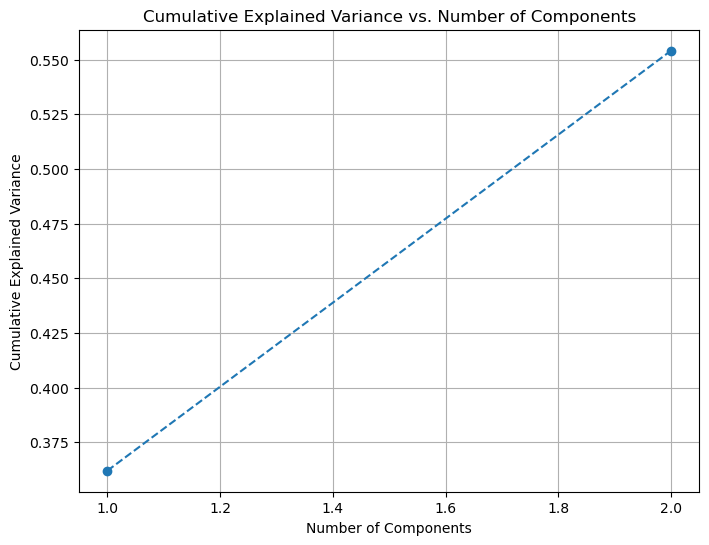

In [18]:
# Plot The Cumulative Explained Variance  
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--') 
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Based On The Plot, Determine The Optimal Number Of Components (E.g., Where Explained Variance Saturates) 



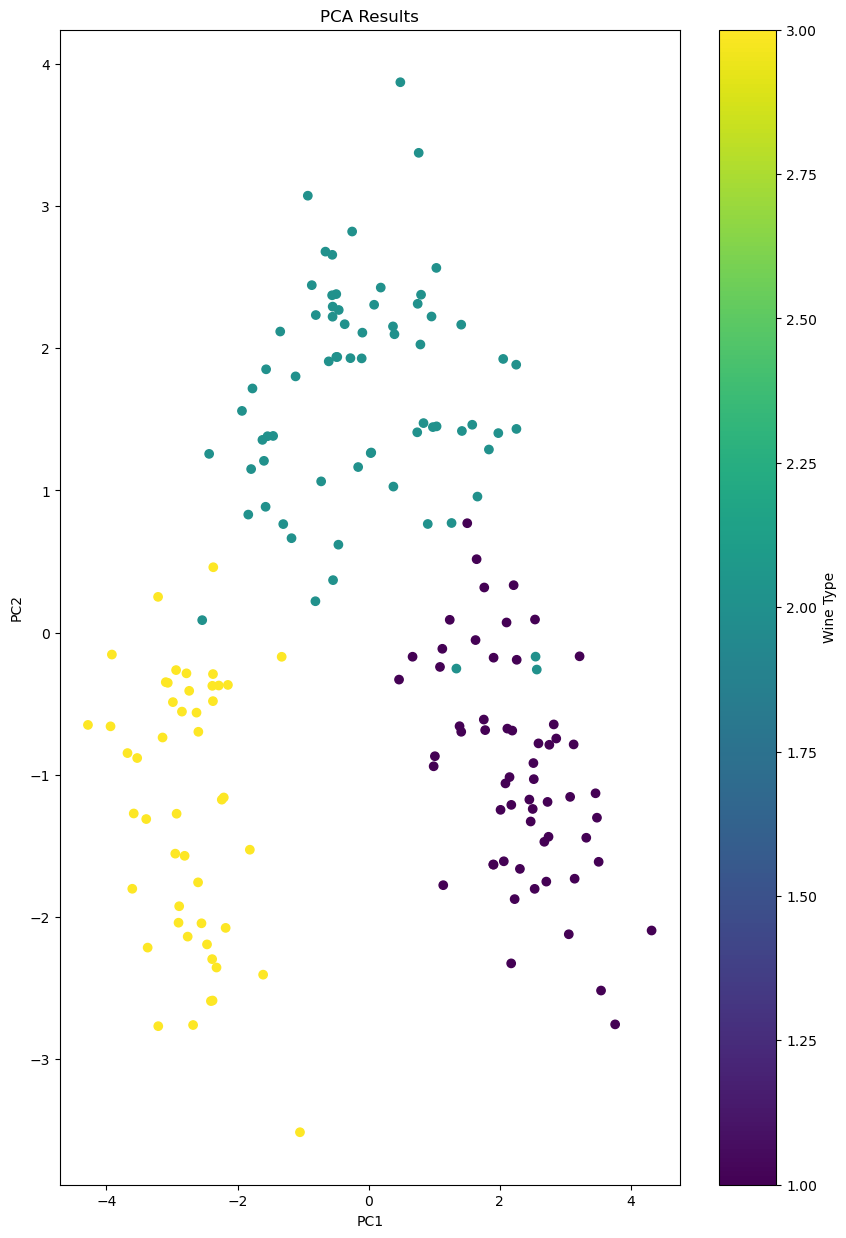

In [19]:
# Step 5: Visualize PCA Results
# Create A Scatter Plot Of The Data In The Reduced Dimensional Space
plt.figure(figsize=(10, 15)) 
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_labels, cmap='viridis') 
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.title('PCA Results') 
plt.colorbar(label='Wine Type') 
plt.show() 



In [23]:
# Step 6: Perform Clustering (K-Means)
# Determine The Optimal Number Of Clusters Using Silhouette Score 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

# The Silhouette Score Is A Metric Used To Evaluate The Quality Of Clusters Formed By A Clustering Algorithm, Such As K-means. 

# Initialize An Empty List To Store Silhouette Scores 
silhouette_scores = []

# Explore A Range Of Cluster Numbers From 2 To 10 
for n_clusters in range(2, 11): 
    # Create A K-means Clustering Model With The Current Number Of Clusters 
    kmeans = KMeans(n_clusters=n_clusters, n_init=10) #  # Explicitly Set n_init To 10 
    
    
    # Fit The K-means Model To The Pca Result And Predict Cluster Labels 
    cluster_labels = kmeans.fit_predict(pca_result)
    
   
    # Calculate The Silhouette Score For The Current Clustering 
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    
    # Append The Silhouette Score To The List 
    silhouette_scores.append(silhouette_avg)

    
print(silhouette_scores) 

[0.46491409089201524, 0.5610505693103246, 0.4914213395710316, 0.45300766641841056, 0.430907848387192, 0.4234668858317838, 0.4071509089593133, 0.3966597727867158, 0.40126020559761083]


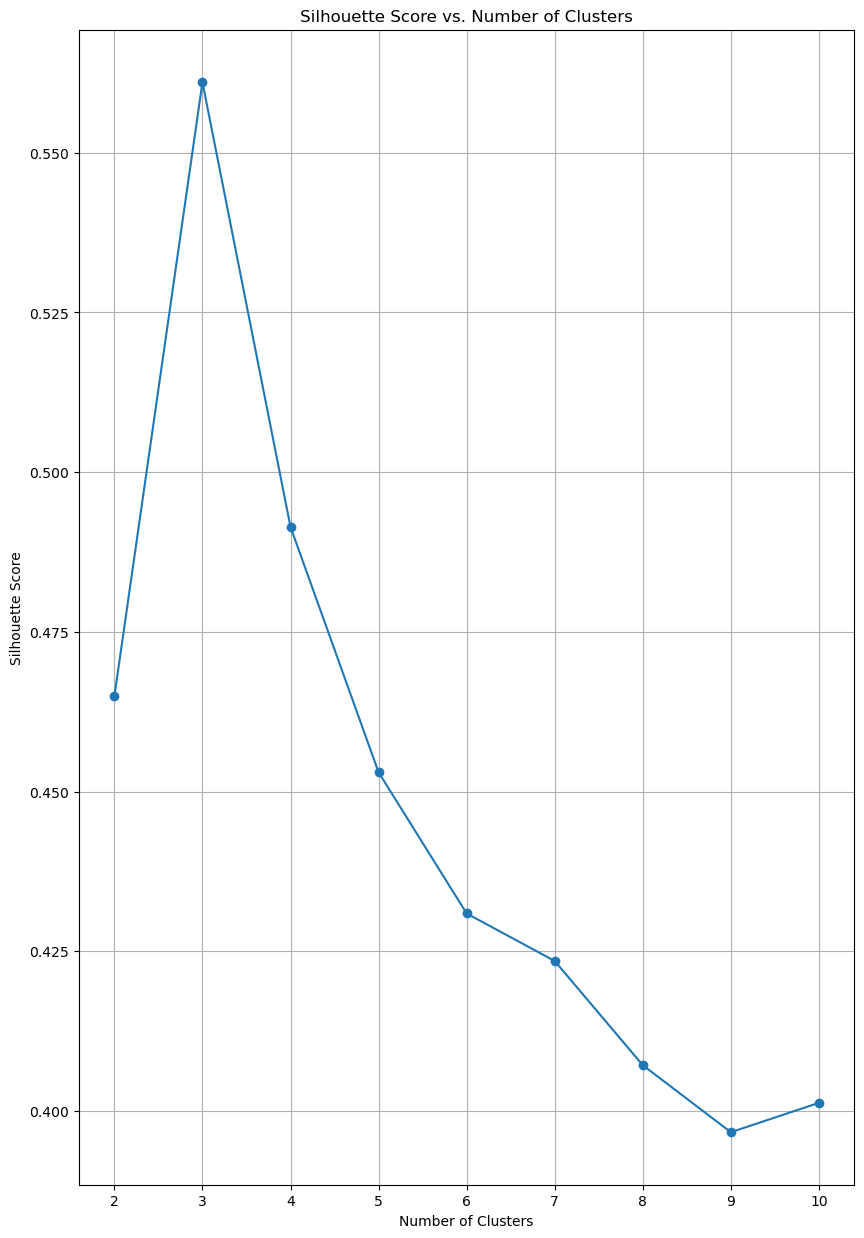

In [24]:
# Plot Silhouette Scores For Different Cluster Numbers 
plt.figure(figsize=(10, 15)) 
plt.plot(range(2, 11), silhouette_scores, marker='o') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Score vs. Number of Clusters') 
plt.grid(True) 
plt.show() 



In [27]:
# Perform K-means Clustering With The Chosen Number Of Clusters

optimal_n_clusters = 3 
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10) 
cluster_labels = kmeans.fit_predict(pca_result)



In [ ]:
# Step 7: Interpret Results
